<a href="https://colab.research.google.com/github/aparnashenoy/ml/blob/master/smote_oversample_ensemble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
path = '/gdrive/My Drive/'

In [4]:
df = pd.read_csv(path +'data_updated.csv')

In [5]:
df.head()

,Unnamed: 0,Gender,custom_hr,custom_temp,custom_age,custom_o2sat,custom_bp,custom_resp,Unit1,Unit2,ICULOS,HospAdmTime,SepsisLabel
0,0,0,2,1,1,1,4,1,1.0,0.0,2,-0.02,0
1,1,0,2,1,1,1,4,1,1.0,0.0,3,-0.02,0
2,2,0,2,1,1,1,4,1,1.0,0.0,4,-0.02,0
3,3,0,0,1,1,2,4,1,1.0,0.0,5,-0.02,0
4,4,0,0,0,1,1,4,1,1.0,0.0,6,-0.02,0


In [6]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [7]:
df.head()

,Gender,custom_hr,custom_temp,custom_age,custom_o2sat,custom_bp,custom_resp,Unit1,Unit2,ICULOS,HospAdmTime,SepsisLabel
0,0,2,1,1,1,4,1,1.0,0.0,2,-0.02,0
1,0,2,1,1,1,4,1,1.0,0.0,3,-0.02,0
2,0,2,1,1,1,4,1,1.0,0.0,4,-0.02,0
3,0,0,1,1,2,4,1,1.0,0.0,5,-0.02,0
4,0,0,0,1,1,4,1,1.0,0.0,6,-0.02,0


In [8]:
df.isna().sum()

Gender          0
custom_hr       0
custom_temp     0
custom_age      0
custom_o2sat    0
custom_bp       0
custom_resp     0
Unit1           0
Unit2           0
ICULOS          0
HospAdmTime     8
SepsisLabel     0
dtype: int64

In [9]:
df.HospAdmTime.unique()

array([-2.0000e-02, -4.0000e-02, -3.0000e-02, ..., -1.4723e+02,
       -4.9000e+01, -9.3800e+00])

In [10]:
df.drop(['HospAdmTime'], axis=1, inplace=True)

In [11]:
df =df.sample(n=100000, random_state=1, replace=True)

In [12]:
df.SepsisLabel.value_counts()

0    98058
1     1942
Name: SepsisLabel, dtype: int64

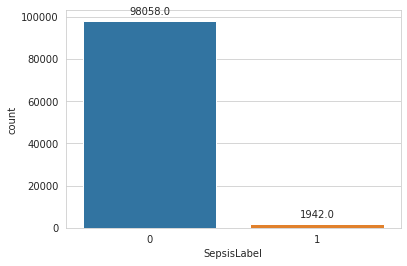

In [13]:
sns.set_style('whitegrid')
ax = sns.countplot(x='SepsisLabel', data=df)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

In [14]:
Xcol = df.drop(columns = ["SepsisLabel"])
ycol = df["SepsisLabel"]

In [15]:
X=np.array(Xcol)
y=np.array(ycol)
X.shape, y.shape

((100000, 10), (100000,))

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((75000, 10), (25000, 10), (75000,), (25000,))

In [17]:
import imblearn

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [18]:
from imblearn import under_sampling, over_sampling

In [19]:
#Performing random undersampling on the training dataset
rus = imblearn.over_sampling.RandomOverSampler(sampling_strategy=1.0)
X_rus, y_rus = rus.fit_resample(X_train, y_train)
X_rus.shape, y_rus.shape

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


((147106, 10), (147106,))

In [20]:
#Checking the class distribution of the target
pd.crosstab(y_rus, columns='count')/len(y_rus)*100

col_0,count
row_0,
0,50.0
1,50.0


In [21]:
pd.crosstab(y_train, columns='count')

col_0,count
row_0,
0,73553
1,1447


In [22]:
pd.crosstab(y_rus, columns = 'count')

col_0,count
row_0,
0,73553
1,73553


In [23]:
#Performing random undersampling on the training dataset
rus = imblearn.under_sampling.RandomUnderSampler(sampling_strategy=1.0)
X_rus_test, y_rus_test = rus.fit_resample(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [24]:
#Checking the class distribution of the target
pd.crosstab(y_rus_test, columns='count')/len(y_rus_test)*100

col_0,count
row_0,
0,50.0
1,50.0


In [25]:
pd.crosstab(y_test, columns='count')

col_0,count
row_0,
0,24505
1,495


In [26]:
pd.crosstab(y_rus_test, columns='count')

col_0,count
row_0,
0,495
1,495


**Logistic Regression**

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [28]:
fold = StratifiedKFold(n_splits=5, random_state=1, shuffle = True)
fold.get_n_splits(X_rus, y_rus)

5

In [29]:
val =list(np.arange(0.001,11,0.1))

In [30]:
parameters = {'solver':('newton-cg', 'liblinear'), 'C':[0.001]}

model = LogisticRegression(penalty='l2', n_jobs = -2, max_iter=1000)
log_reg = GridSearchCV(model, parameters, n_jobs= -2, cv=fold)

log_reg.fit(X_rus, y_rus)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=1000, multi_class='auto',
                                          n_jobs=-2, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-2,
             param_grid={'C': [0.001], 'solver': ('newton-cg', 'liblinear')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [31]:
print(log_reg.best_params_)

{'C': 0.001, 'solver': 'liblinear'}


In [32]:
yt_pred_log_reg = log_reg.predict(X_rus_test)
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_rus_test, yt_pred_log_reg ))

ac= accuracy_score(y_rus_test, yt_pred_log_reg)
print('test_accuracy = {} % '.format(ac * 100))

              precision    recall  f1-score   support

           0       0.63      0.73      0.68       495
           1       0.68      0.57      0.62       495

    accuracy                           0.65       990
   macro avg       0.65      0.65      0.65       990
weighted avg       0.65      0.65      0.65       990

test_accuracy = 65.05050505050505 % 


In [33]:
from sklearn.metrics import confusion_matrix

In [34]:
cf_matrix = confusion_matrix(y_rus_test, yt_pred_log_reg)
print(cf_matrix)

[[360 135]
 [211 284]]


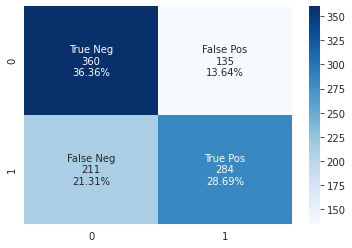

In [35]:
import seaborn as sns
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

**KNN**

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import fbeta_score, make_scorer
f_scorer = make_scorer(fbeta_score, beta=1)

params = {'n_neighbors':[2, 100, 10, 5, 6, 7, 9, 99]}

KNN = KNeighborsClassifier(algorithm='brute')
Knn_grid = GridSearchCV(KNN, params, n_jobs= -2, cv=fold, scoring=f_scorer, verbose=True)

Knn_grid.fit(X_rus, y_rus)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done  40 out of  40 | elapsed: 38.8min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             error_score=nan,
             estimator=KNeighborsClassifier(algorithm='brute', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-2,
             param_grid={'n_neighbors': [2, 100, 10, 5, 6, 7, 9, 99]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(fbeta_score, beta=1), verbose=True)

In [37]:
print(Knn_grid.best_params_)

{'n_neighbors': 5}


In [38]:
yt_pred_knn = Knn_grid.predict(X_rus_test)

print(classification_report(y_rus_test, yt_pred_knn ))

ac= accuracy_score(y_rus_test, yt_pred_knn)
print('test_accuracy = {} % '.format(ac * 100))

              precision    recall  f1-score   support

           0       0.55      0.84      0.67       495
           1       0.67      0.32      0.43       495

    accuracy                           0.58       990
   macro avg       0.61      0.58      0.55       990
weighted avg       0.61      0.58      0.55       990

test_accuracy = 58.18181818181818 % 


In [39]:
cf_matrix = confusion_matrix(y_rus_test, yt_pred_knn)
print(cf_matrix)

[[418  77]
 [337 158]]


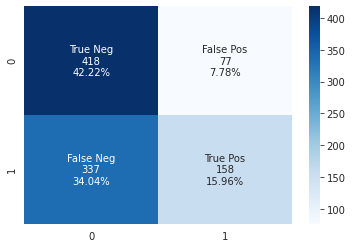

In [40]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [41]:
from sklearn.naive_bayes import ComplementNB
NB_comp = ComplementNB()
NB_comp.fit(X_rus, y_rus)

y_pred_NB_comp= NB_comp.predict(X_rus_test)

from sklearn.metrics import classification_report
print(classification_report(y_rus_test, y_pred_NB_comp))

              precision    recall  f1-score   support

           0       0.61      0.79      0.69       495
           1       0.70      0.49      0.58       495

    accuracy                           0.64       990
   macro avg       0.66      0.64      0.63       990
weighted avg       0.66      0.64      0.63       990



In [42]:
cf_matrix = confusion_matrix(y_rus_test, y_pred_NB_comp)
print(cf_matrix)

[[391 104]
 [250 245]]


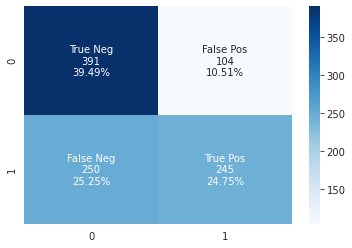

In [43]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [44]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion = 'gini')

dtree.fit(X_rus, y_rus)

y_pred_dtree= dtree.predict(X_rus_test)

from sklearn.metrics import classification_report
print(classification_report(y_rus_test, y_pred_dtree))

              precision    recall  f1-score   support

           0       0.53      0.88      0.66       495
           1       0.65      0.22      0.32       495

    accuracy                           0.55       990
   macro avg       0.59      0.55      0.49       990
weighted avg       0.59      0.55      0.49       990



In [45]:
ccp = dtree.cost_complexity_pruning_path(X_rus, y_rus)
alphas = ccp.ccp_alphas
impurities = ccp.impurities

new_dTrees = []
i=0

for alpha in alphas:
    new_dTree = DecisionTreeClassifier(criterion='gini', ccp_alpha=alpha)
    new_dTree.fit(X_rus, y_rus)
    
    new_dTrees.append(new_dTree)

In [46]:
test_scores = [new_dTree.score(X_rus_test, y_rus_test) for new_dTree in new_dTrees]
print('max f1 test_score = {}'.format(max(test_scores)))
print('position of max f1 = {}'.format(np.argmax(test_scores)))

pruned_dTree = DecisionTreeClassifier(criterion='gini', ccp_alpha=alphas[np.argmax(test_scores)])

pruned_dTree.fit(X_rus, y_rus)

ytpred_dTree = pruned_dTree.predict(X_rus_test)

from sklearn.metrics import classification_report

print(classification_report(y_rus_test, ytpred_dTree))

max f1 test_score = 0.6737373737373737
position of max f1 = 1780
              precision    recall  f1-score   support

           0       0.65      0.75      0.70       495
           1       0.71      0.60      0.65       495

    accuracy                           0.67       990
   macro avg       0.68      0.67      0.67       990
weighted avg       0.68      0.67      0.67       990



In [47]:
cf_matrix = confusion_matrix(y_rus_test, ytpred_dTree)
print(cf_matrix)

[[372 123]
 [200 295]]


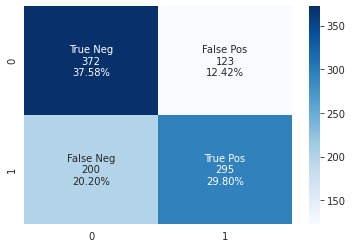

In [48]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [49]:
import graphviz

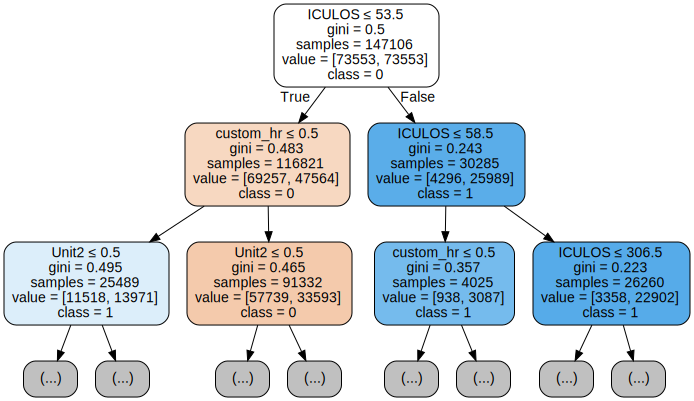

In [50]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

data = export_graphviz(dtree,out_file=None,feature_names=df.drop(['SepsisLabel'], axis = 1).columns,
                       class_names=['0', '1'],  
                       filled=True, rounded=True,  
                       max_depth=2,
                       special_characters=True)
graph = graphviz.Source(data)
graph

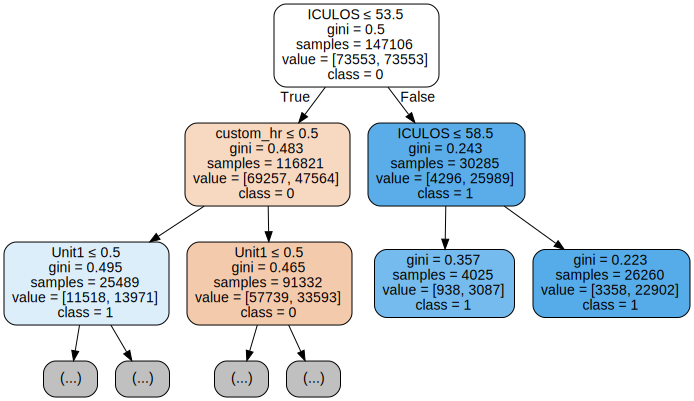

In [51]:
data = export_graphviz(pruned_dTree,out_file=None,feature_names=df.drop(['SepsisLabel'], axis = 1).columns,
                       class_names=['0', '1'],  
                       filled=True, rounded=True,  
                       max_depth=2,
                       special_characters=True)
graph = graphviz.Source(data)
graph

In [52]:
logreg_probs = log_reg.predict_proba(X_rus_test)
Knn_grid_probs = Knn_grid.predict_proba(X_rus_test)
NB_comp_probs = NB_comp.predict_log_proba(X_rus_test)
Dtree_probs = pruned_dTree.predict_proba(X_rus_test)

In [53]:
print(logreg_probs)

[[0.66472869 0.33527131]
 [0.66005175 0.33994825]
 [0.59269071 0.40730929]
 ...
 [0.03047216 0.96952784]
 [0.1891006  0.8108994 ]
 [0.68140297 0.31859703]]


In [54]:
# keep probabilities for the positive outcome only
logreg_probs = logreg_probs[:, 1]
Knn_grid_probs = Knn_grid_probs[:, 1]
NB_comp_probs = NB_comp_probs[:, 1]
Dtree_probs = Dtree_probs[:, 1]

In [55]:
from sklearn.metrics import roc_auc_score

# calculate scores
logreg_auc = roc_auc_score(y_rus_test, logreg_probs)
Knn_grid_auc = roc_auc_score(y_rus_test, Knn_grid_probs)
NB_comp_auc = roc_auc_score(y_rus_test, NB_comp_probs)
Dtree_auc = roc_auc_score(y_rus_test, Dtree_probs)

print('Logistic: ROC AUC= {} %'.format(round(logreg_auc, 3)*100))
print('KNN: ROC AUC= {} %'.format(round(Knn_grid_auc, 3)*100))
print('NB: ROC AUC= {} %'.format(round(NB_comp_auc, 3)*100))
print('DTree: ROC AUC= {} %'.format(round(Dtree_auc, 3)*100))

Logistic: ROC AUC= 71.5 %
KNN: ROC AUC= 60.6 %
NB: ROC AUC= 66.9 %
DTree: ROC AUC= 72.5 %


In [56]:
from sklearn.metrics import roc_curve
#fpr --> False Positive Rate
#tpr --> True Positive Rate
logreg_fpr, logreg_tpr, lr_thres = roc_curve(y_rus_test, logreg_probs)
Knn_fpr, Knn_tpr, Knn_thres = roc_curve(y_rus_test, Knn_grid_probs)
NB_fpr, NB_tpr, NB_thres = roc_curve(y_rus_test, NB_comp_probs)
Dtree_fpr, Dtree_tpr, Dtree_thres = roc_curve(y_rus_test, Dtree_probs)

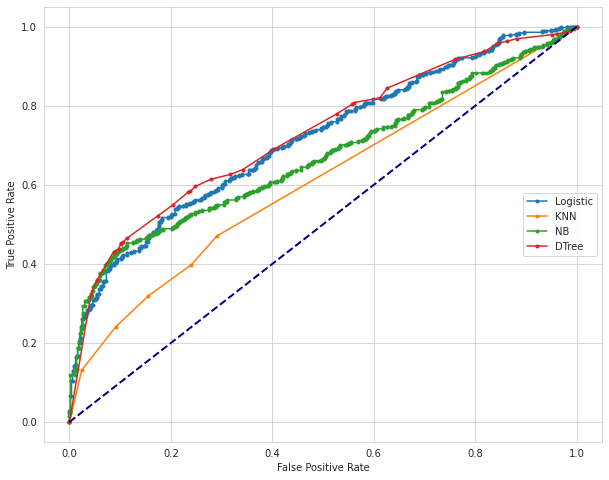

In [57]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(logreg_fpr, logreg_tpr, marker='.', label='Logistic')
ax.plot(Knn_fpr, Knn_tpr, marker='.', label='KNN')
ax.plot(NB_fpr, NB_tpr, marker='.', label='NB')
ax.plot(Dtree_fpr, Dtree_tpr, marker='.', label='DTree')
lw = 2
ax.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend(loc=5)
# show the plot
plt.show()

In [58]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=1000)
rf.fit(X_rus, y_rus)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [59]:
y_pred_rf= rf.predict(X_rus_test)

from sklearn.metrics import classification_report
print(classification_report(y_rus_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.53      0.88      0.67       495
           1       0.66      0.23      0.34       495

    accuracy                           0.56       990
   macro avg       0.60      0.56      0.50       990
weighted avg       0.60      0.56      0.50       990



In [60]:
cf_matrix = confusion_matrix(y_rus_test, y_pred_rf)
print(cf_matrix)

[[438  57]
 [382 113]]


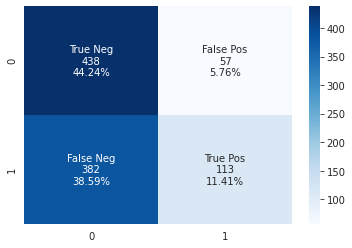

In [61]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [62]:
rf_probs = rf.predict_proba(X_rus_test)
rf_probs = rf_probs[:, 1]
rf_auc = roc_auc_score(y_rus_test, rf_probs)

print('RF - ROC AUC= {} %'.format(round(rf_auc, 3)*100))

RF - ROC AUC= 66.5 %


In [63]:
rf_fpr, rf_tpr, rf_thres = roc_curve(y_rus_test, rf_probs)

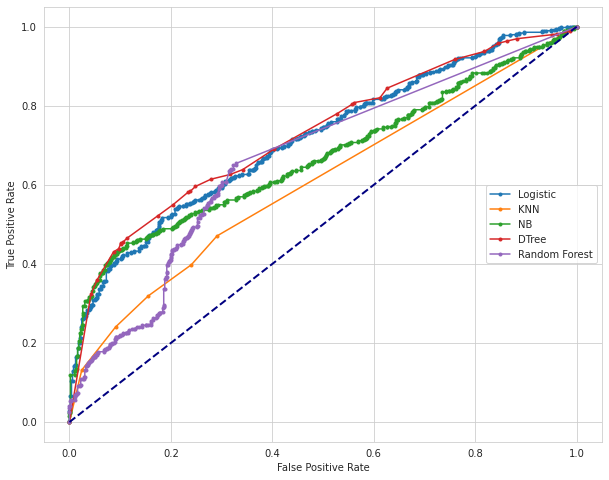

In [64]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(logreg_fpr, logreg_tpr, marker='.', label='Logistic')
ax.plot(Knn_fpr, Knn_tpr, marker='.', label='KNN')
ax.plot(NB_fpr, NB_tpr, marker='.', label='NB')
ax.plot(Dtree_fpr, Dtree_tpr, marker='.', label='DTree')
ax.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest')
lw = 2
ax.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend(loc=5)
# show the plot
plt.show()

In [65]:
from sklearn.preprocessing import OneHotEncoder

# It is important to train the ensemble of trees on a different subset of the training 
#data than the linear regression model to avoid overfitting, in particular 
#if the total number of leaves is similar to the number of training samples
x_rus, X_rus_lr, yrus, y_rus_lr = train_test_split(X_rus, y_rus, test_size=0.60, shuffle = True)

rf = RandomForestClassifier(n_estimators=1000)
#train Random forest on a set of samples
rf.fit(x_rus, yrus)

#one hot encoder of the leaves
rf_enc = OneHotEncoder()

#for these leaves of RF, fit the one hot encoder
rf_enc.fit(rf.apply(X_rus))

rf_enc

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=True)

In [66]:
f = rf_enc.transform(rf.apply(X_rus_lr))
f.shape

(88264, 2748662)

In [67]:
fold = StratifiedKFold(n_splits=5, random_state=1, shuffle = True)
fold.get_n_splits(X_rus_lr, y_rus_lr)

parameters = {'solver':('liblinear', 'sag'), 'C':[0.001]}

model = LogisticRegression(penalty='l2', n_jobs = -2, max_iter=1000)
rf_lr = GridSearchCV(model, parameters, n_jobs= -2, cv=fold)


rf_lr.fit(rf_enc.transform(rf.apply(X_rus_lr)), y_rus_lr)

print(rf_lr.best_params_)

{'C': 0.001, 'solver': 'sag'}


In [68]:
yprobs_rf_lr = rf_lr.predict_proba(rf_enc.transform(rf.apply(X_rus_test)))
yprobs_rf_lr= yprobs_rf_lr[:, 1]

In [69]:
rf_lr_auc = roc_auc_score(y_rus_test, yprobs_rf_lr)
print('Logistic regression + Random Forest: ROC AUC= {} %'.format(round(rf_lr_auc, 3)*100))

Logistic regression + Random Forest: ROC AUC= 70.39999999999999 %


In [70]:
y_pred_rf_lr = rf_lr.predict(rf_enc.transform(rf.apply(X_rus_test)))

In [71]:
print(classification_report(y_rus_test, y_pred_rf_lr))

              precision    recall  f1-score   support

           0       0.55      0.87      0.68       495
           1       0.70      0.30      0.42       495

    accuracy                           0.59       990
   macro avg       0.63      0.59      0.55       990
weighted avg       0.63      0.59      0.55       990



In [72]:
cf_matrix = confusion_matrix(y_rus_test, y_pred_rf_lr)
print(cf_matrix)

[[432  63]
 [347 148]]


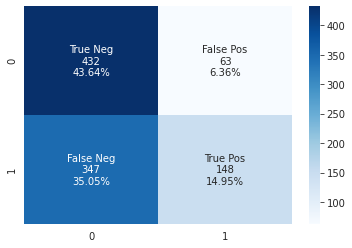

In [73]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [74]:
fpr_rf_lr, tpr_rf_lr, thres_rf_lr = roc_curve(y_rus_test, yprobs_rf_lr)

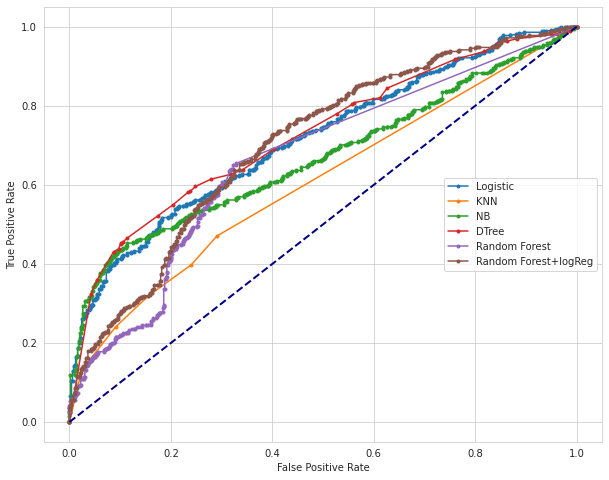

In [75]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(logreg_fpr, logreg_tpr, marker='.', label='Logistic')
ax.plot(Knn_fpr, Knn_tpr, marker='.', label='KNN')
ax.plot(NB_fpr, NB_tpr, marker='.', label='NB')
ax.plot(Dtree_fpr, Dtree_tpr, marker='.', label='DTree')
ax.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest')
ax.plot(fpr_rf_lr, tpr_rf_lr, marker='.', label='Random Forest+logReg')
lw = 2
ax.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend(loc=5)
# show the plot
plt.show()

In [76]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(X_rus, y_rus)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=0)

In [77]:
y_pred_clf= clf.predict(X_rus_test)

from sklearn.metrics import classification_report
print(classification_report(y_rus_test, y_pred_clf))

              precision    recall  f1-score   support

           0       0.64      0.80      0.71       495
           1       0.73      0.55      0.63       495

    accuracy                           0.68       990
   macro avg       0.69      0.68      0.67       990
weighted avg       0.69      0.68      0.67       990



In [78]:
cf_matrix = confusion_matrix(y_rus_test, y_pred_clf)
print(cf_matrix)

[[395 100]
 [221 274]]


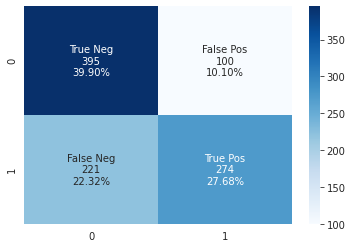

In [79]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [80]:
clf_probs = clf.predict_proba(X_rus_test)
clf_probs = clf_probs[:, 1]
clf_auc = roc_auc_score(y_rus_test, clf_probs)

print('ADABOOST - ROC AUC= {} %'.format(round(clf_auc, 3)*100))

ADABOOST - ROC AUC= 74.1 %


In [81]:
clf_fpr, clf_tpr, clf_thres = roc_curve(y_rus_test, clf_probs)

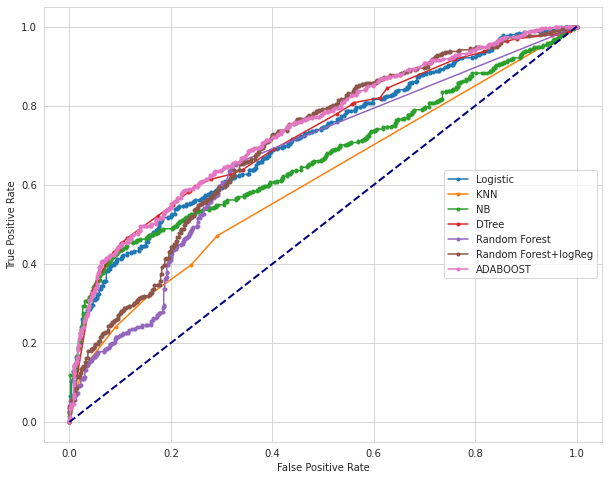

In [82]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(logreg_fpr, logreg_tpr, marker='.', label='Logistic')
ax.plot(Knn_fpr, Knn_tpr, marker='.', label='KNN')
ax.plot(NB_fpr, NB_tpr, marker='.', label='NB')
ax.plot(Dtree_fpr, Dtree_tpr, marker='.', label='DTree')
ax.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest')
ax.plot(fpr_rf_lr, tpr_rf_lr, marker='.', label='Random Forest+logReg')
ax.plot(clf_fpr, clf_tpr, marker='.', label='ADABOOST')
lw = 2
ax.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend(loc=5)
# show the plot
plt.show()

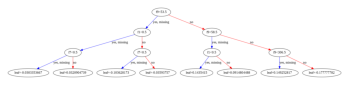

<Figure size 3600x3960 with 0 Axes>

In [83]:
from xgboost import XGBClassifier
from xgboost import plot_tree
import matplotlib.pyplot as plt
model = XGBClassifier()

# Train
model.fit(X_rus, y_rus)

plot_tree(model)
plt.figure(figsize = (50,55))
plt.show()

In [84]:
y_pred_xgb= model.predict(X_rus_test)

from sklearn.metrics import classification_report
print(classification_report(y_rus_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.64      0.80      0.71       495
           1       0.73      0.55      0.62       495

    accuracy                           0.67       990
   macro avg       0.68      0.67      0.67       990
weighted avg       0.68      0.67      0.67       990



In [85]:
cf_matrix = confusion_matrix(y_rus_test, y_pred_xgb)
print(cf_matrix)

[[394 101]
 [225 270]]


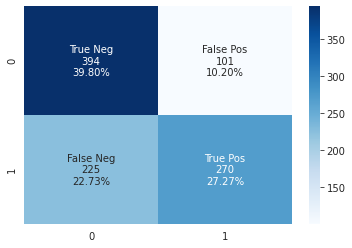

In [86]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [87]:
model_probs = model.predict_proba(X_rus_test)
model_probs = model_probs[:, 1]
model_auc = roc_auc_score(y_rus_test, model_probs)

print('XGBoost - ROC AUC= {} %'.format(round(model_auc, 3)*100))

XGBoost - ROC AUC= 74.0 %


In [88]:
model_fpr, model_tpr, model_thres = roc_curve(y_rus_test, model_probs)

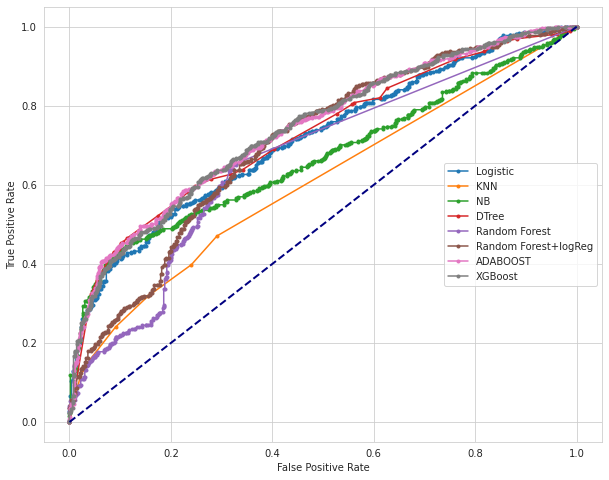

In [89]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(logreg_fpr, logreg_tpr, marker='.', label='Logistic')
ax.plot(Knn_fpr, Knn_tpr, marker='.', label='KNN')
ax.plot(NB_fpr, NB_tpr, marker='.', label='NB')
ax.plot(Dtree_fpr, Dtree_tpr, marker='.', label='DTree')
ax.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest')
ax.plot(fpr_rf_lr, tpr_rf_lr, marker='.', label='Random Forest+logReg')
ax.plot(clf_fpr, clf_tpr, marker='.', label='ADABOOST')
ax.plot(model_fpr, model_tpr, marker = '.', label='XGBoost')
lw = 2
ax.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend(loc=5)
# show the plot
plt.show()

In [90]:
rf_knn = GridSearchCV(KNN, params, n_jobs=-2, cv=fold)
rf_knn.fit(rf_enc.transform(rf.apply(X_rus_lr)), y_rus_lr)

print(rf_knn.best_params_)

{'n_neighbors': 7}


In [91]:
yprobs_rf_knn = rf_knn.predict_proba(rf_enc.transform(rf.apply(X_rus_test)))
yprobs_rf_knn= yprobs_rf_knn[:, 1]

In [92]:
rf_knn_auc = roc_auc_score(y_rus_test, yprobs_rf_knn)
print('KNN + Random Forest: ROC AUC= {} %'.format(round(rf_lr_auc, 3)*100))

KNN + Random Forest: ROC AUC= 70.39999999999999 %


In [93]:
y_pred_rf_knn= rf_knn.predict(rf_enc.transform(rf.apply(X_rus_test)))

In [94]:
print(classification_report(y_rus_test, y_pred_rf_knn))

              precision    recall  f1-score   support

           0       0.56      0.87      0.68       495
           1       0.71      0.31      0.43       495

    accuracy                           0.59       990
   macro avg       0.63      0.59      0.55       990
weighted avg       0.63      0.59      0.55       990



In [95]:
cf_matrix = confusion_matrix(y_rus_test, y_pred_rf_knn)
print(cf_matrix)

[[432  63]
 [343 152]]


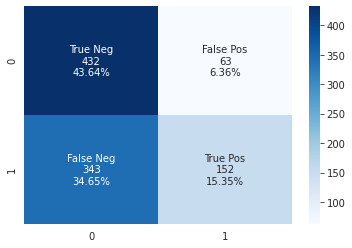

In [96]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [97]:
fpr_rf_knn, tpr_rf_knn, thres_rf_knn = roc_curve(y_rus_test, yprobs_rf_knn)

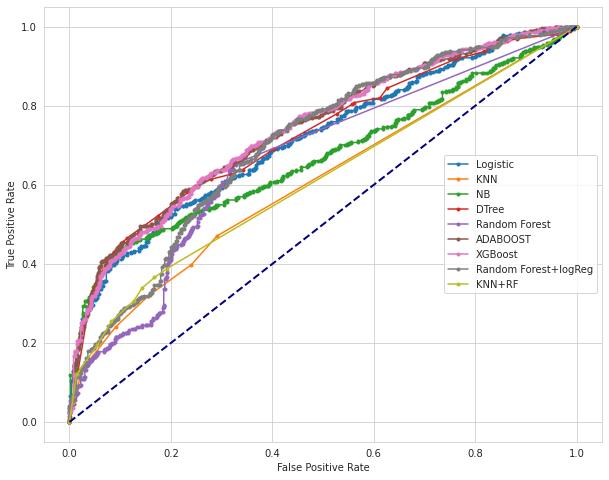

In [98]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(logreg_fpr, logreg_tpr, marker='.', label='Logistic')
ax.plot(Knn_fpr, Knn_tpr, marker='.', label='KNN')
ax.plot(NB_fpr, NB_tpr, marker='.', label='NB')
ax.plot(Dtree_fpr, Dtree_tpr, marker='.', label='DTree')
ax.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest')
ax.plot(clf_fpr, clf_tpr, marker='.', label='ADABOOST')
ax.plot(model_fpr, model_tpr, marker = '.', label='XGBoost')
ax.plot(fpr_rf_lr, tpr_rf_lr, marker='.', label='Random Forest+logReg')
ax.plot(fpr_rf_knn, tpr_rf_knn, marker='.', label='KNN+RF')
lw=2
ax.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend(loc=5)
# show the plot
plt.show()

In [99]:
print('Logistic: ROC AUC= {} %'.format(round(logreg_auc, 3)*100))
print('KNN: ROC AUC= {} %'.format(round(Knn_grid_auc, 3)*100))
print('NB: ROC AUC= {} %'.format(round(NB_comp_auc, 3)*100))
print('DTree: ROC AUC= {} %'.format(round(Dtree_auc, 3)*100))
print('Logistic: ROC AUC= {} %'.format(round(logreg_auc, 3)*100))
print('RF - ROC AUC= {} %'.format(round(rf_auc, 3)*100))
print('Logistic regression + Random Forest: ROC AUC= {} %'.format(round(rf_lr_auc, 3)*100))
print('ADABOOST - ROC AUC= {} %'.format(round(clf_auc, 3)*100))
print('XGBoost - ROC AUC= {} %'.format(round(model_auc, 3)*100))
print('KNN + Random Forest: ROC AUC= {} %'.format(round(rf_lr_auc, 3)*100))

Logistic: ROC AUC= 71.5 %
KNN: ROC AUC= 60.6 %
NB: ROC AUC= 66.9 %
DTree: ROC AUC= 72.5 %
Logistic: ROC AUC= 71.5 %
RF - ROC AUC= 66.5 %
Logistic regression + Random Forest: ROC AUC= 70.39999999999999 %
ADABOOST - ROC AUC= 74.1 %
XGBoost - ROC AUC= 74.0 %
KNN + Random Forest: ROC AUC= 70.39999999999999 %
